<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/ML_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №3

Машинне навчання

Завдання

До власного набору даних застосувати регуляризацію для лінійної регресії:

Побудувати Forward та Backward Selection для вибору найкращих ознак.

Побудувати Рідж регресію.

Порівняти результати.

Зробити висновки.

In [19]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [20]:
# Завантаження датасету
housing = fetch_openml(name="house_prices", as_frame=True)
X, y = housing.data, housing.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Опис датасету "house_prices":

Основні характеристики:

Кількість рядків: 1460

Кількість ознак: 80

Цільова змінна: SalePrice (ціна продажу)

Опис ознак: Id: Ідентифікатор власності.

MSSubClass: Клас типу житла.

MSZoning: Загальна класифікація зонингу (зонування).

LotFrontage: Лінійні фути фасаду власності.

LotArea: Розмір лота в квадратних футах.

Street: Тип дороги до власності.

Alley: Тип алеї доступу до власності.

LotShape: Форма лоту.

LandContour: Рівень власності.

Utilities: Наявність комунальних послуг.

LotConfig: Конфігурація лоту.

LandSlope: Схил власності.

Neighborhood: Фізичні розташування в межах міста.

Condition1: Близькість до основних доріг або залізниць.

Condition2: Близькість до основних доріг або залізниць (друга ознака).

BldgType: Тип житлової будівлі.

HouseStyle: Стиль житлової будівлі.

OverallQual: Загальна якість матеріалів і фінішів.

OverallCond: Загальний стан будівлі.

YearBuilt: Рік побудови будівлі.

YearRemodAdd: Рік реконструкції або добудови.

RoofStyle: Тип покрівлі.

RoofMatl: Матеріал покрівлі.

Exterior1st: Зовнішній вид.

Exterior2nd: Зовнішній вид (друга ознака).

MasVnrType: Тип кам'яної кладки.

MasVnrArea: Площа кам'яної кладки.

ExterQual: Зовнішня якість матеріалів.

ExterCond: Зовнішній стан будівлі.

Foundation: Тип фундаменту.

BsmtQual: Якість підвалу.

BsmtCond: Стан підвалу.

BsmtExposure: Підвальне освітлення.

BsmtFinType1: Тип обробки підвалу.

BsmtFinSF1: Площа обробленого підвалу.

BsmtFinType2: Другий тип обробки підвалу.

BsmtFinSF2: Площа другого типу обробленого підвалу.

BsmtUnfSF: Площа необробленого підвалу.

TotalBsmtSF: Загальна площа підвалу.

Heating: Тип опалення.

HeatingQC: Якість та стан опалення.

CentralAir: Центральне кондиціювання.

Electrical: Тип електропроводки.

1stFlrSF: Площа першого поверху.

2ndFlrSF: Площа другого поверху.

LowQualFinSF: Площа низькоякісного оздоблення.

GrLivArea: Площа житлової зони над землею.

BsmtFullBath: Повні ванні кімнати в підвалі.

BsmtHalfBath: Половинні ванні кімнати в підвалі.

FullBath: Повні ванні кімнати.

HalfBath: Половинні ванні кімнати.

BedroomAbvGr: Кількість спалень над рівнем землі.

KitchenAbvGr: Кількість кухонь над рівнем землі.

KitchenQual: Якість кухні. TotRmsAbvGrd: Загальна кількість кімнат над рівнем землі (крім ванних кімнат).

Functional: Рейтинг функціональності будівлі.

Fireplaces: Кількість камінів.

FireplaceQu: Якість каміна.

GarageType: Тип гаража.

GarageYrBlt: Рік побудови гаража.

GarageFinish: Тип обробки інтер'єру гаража.

GarageCars: Кількість машин, що вміщує гараж.

GarageArea: Площа гаража.

GarageQual: Якість гаража.

GarageCond: Стан гаража.

PavedDrive: Тип під'їзної дороги.

WoodDeckSF: Площа дерев'яної тераси.

OpenPorchSF: Площа відкритої веранди.

EnclosedPorch: Площа закритої веранди.

3SsnPorch: Площа веранди для трьох сезонів.

ScreenPorch: Площа екранованої веранди.

PoolArea: Площа басейну.

PoolQC: Якість басейну.

Fence: Якість паркану.

MiscFeature: Інші особливості.

MiscVal: Вартість інших особливостей.

MoSold: Місяць продажу.

YrSold: Рік продажу.

SaleType: Тип продажу.

SaleCondition: Умова продажу.

Цільова змінна:

SalePrice: Ціна продажу.

In [85]:
print(X.head())
print(y.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   None  None        None   
1         Lvl    AllPub  ...           0        0   None  None        None   
2         Lvl    AllPub  ...           0        0   None  None        None   
3         Lvl    AllPub  ...           0        0   None  None        None   
4         Lvl    AllPub  ...           0        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD

In [21]:
# Розділення датасету на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Виділення числових та категоріальних ознак
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [33]:
# Отримання категоріальних ознак
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [39]:
import numpy as np

In [40]:
# One-Hot Encoding категоріальних ознак
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Заповнення пропущених значень середніми
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train.drop(columns=categorical_cols))
X_test_imputed = imputer.transform(X_test.drop(columns=categorical_cols))

# # Об'єднання оброблених даних
# X_train_final = np.hstack((X_train_encoded, X_train_imputed))
# X_test_final = np.hstack((X_test_encoded, X_test_imputed))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [41]:
# Побудова трансформера для числових та категоріальних ознак
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [42]:
# Створення повного пайплайну для передобробки і моделювання
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

In [50]:
# Forward Selection
lr = LinearRegression()
selector_forward = SequentialFeatureSelector(lr, direction='forward', scoring='neg_mean_squared_error')
selector_forward.fit(X_train_imputed, y_train)
best_features_forward = [X.columns[i] for i, feature in enumerate(selector_forward.get_support()) if feature]
print("Forward Selected Features:", best_features_forward)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Forward Selected Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtExposure', 'BsmtFinSF1']


In [48]:
# Backward Selection
selector_backward = SequentialFeatureSelector(lr, direction='backward', scoring='neg_mean_squared_error')
selector_backward.fit(X_train_imputed, y_train)
best_features_backward = [X.columns[i] for i, feature in enumerate(selector_backward.get_support()) if feature]
print("Backward Selected Features:", best_features_backward)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Backward Selected Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Condition1', 'Condition2', 'BldgType', 'OverallQual', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtExposure']


In [87]:
print("Number of Forward Selected Features:", len(best_features_forward))
print("Number of Backward Selected Features:", len(best_features_backward))

Number of Forward Selected Features: 18
Number of Backward Selected Features: 18


In [52]:
# Порівняння з початковими ознаками
all_features = list(X.columns)
forward_removed_features = [feature for feature in all_features if feature not in best_features_forward]
backward_removed_features = [feature for feature in all_features if feature not in best_features_backward]

print("Forward Removed Features:", forward_removed_features)
print("Backward Removed Features:", backward_removed_features)

Forward Removed Features: ['MSZoning', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Backward Removed Features: ['Id', 'MSZoning', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'HouseStyle', 'Overall

# **Рідж**

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Отримати дані для обраних ознак
X_train_selected_forward = X_train_imputed[:, [X.columns.get_loc(col) for col in best_features_forward]]
X_test_selected_forward = X_test_imputed[:, [X.columns.get_loc(col) for col in best_features_forward]]

X_train_selected_backward = X_train_imputed[:, [X.columns.get_loc(col) for col in best_features_backward]]
X_test_selected_backward = X_test_imputed[:, [X.columns.get_loc(col) for col in best_features_backward]]

# Побудувати модель регресії Ріджа
ridge_model_forward = Ridge(alpha=1.0)  # Підберіть параметр alpha за потребою
ridge_model_backward = Ridge(alpha=1.0)

# Навчати модель на обраних ознаках
ridge_model_forward.fit(X_train_selected_forward, y_train)
ridge_model_backward.fit(X_train_selected_backward, y_train)

# Зробити прогнози
y_pred_forward = ridge_model_forward.predict(X_test_selected_forward)
y_pred_backward = ridge_model_backward.predict(X_test_selected_backward)

# Оцінка результатів
mse_forward = mean_squared_error(y_test, y_pred_forward)
mse_backward = mean_squared_error(y_test, y_pred_backward)

print("Mean Squared Error for Forward Selection:", mse_forward)
print("Mean Squared Error for Backward Selection:", mse_backward)


Mean Squared Error for Forward Selection: 1469210555.868116
Mean Squared Error for Backward Selection: 1377572864.0513628


Forward Selection
 За допомогою методу "Forward Selection" було обрано набір ознак, які найкраще підходять для моделі Ridge Regression. Середньоквадратична помилка (MSE) для цього набору ознак на тестовому наборі даних складає 1,469,210,555.87. Це означає, що середньоквадратична відстань між фактичними та прогнозованими значеннями для цього набору ознак дорівнює цій величині.

Backward Selection
 За допомогою методу "Backward Selection" було обрано інший набір ознак, які найкраще підходять для моделі Ridge Regression. Середньоквадратична помилка (MSE) для цього набору ознак на тестовому наборі даних складає 1,377,572,864.05. Це означає, що середньоквадратична відстань між фактичними та прогнозованими значеннями для цього набору ознак дорівнює цій величині.

На перший погляд можна визначити, що MSE для обраного набору ознак методом "Backward Selection" трохи менше, ніж для набору ознак, обраного методом "Forward Selection". Однак, обидва значення MSE є великими, що може вказувати на те, що модель Ridge Regression може не досить ефективно узагальнюватися на тестових даних.

In [77]:
from sklearn.linear_model import RidgeCV

# Рідж регресія з автоматичною крос-валідацією для вибору параметра alpha
ridge_cv_model = RidgeCV(alphas=alphas)

# Навчати модель на всіх ознаках
ridge_cv_model.fit(X_train_imputed, y_train)

# Отримати найкраще значення параметра alpha
best_alpha = ridge_cv_model.alpha_

# Побудувати модель регресії Ріджа з найкращим параметром alpha
ridge_model_best_alpha = Ridge(alpha=best_alpha)

# Навчати модель на всіх ознаках
ridge_model_best_alpha.fit(X_train_imputed, y_train)

# Зробити прогнози
y_pred_best_alpha = ridge_model_best_alpha.predict(X_test_imputed)

# Оцінка результатів
mse_best_alpha = mean_squared_error(y_test, y_pred_best_alpha)

print("Mean Squared Error for Ridge Regression with Best Alpha:", mse_best_alpha)
print("Best Alpha:", best_alpha)


Mean Squared Error for Ridge Regression with Best Alpha: 1354720111.195877
Best Alpha: 100.0


In [67]:
# Рідж регресія
alphas = [0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    model_ridge = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', ridge)])
    model_ridge.fit(X_train, y_train)
    ridge_train_mse = mean_squared_error(y_train, model_ridge.predict(X_train))
    ridge_test_mse = mean_squared_error(y_test, model_ridge.predict(X_test))
    print(f"Ridge Regression with alpha={alpha}:")
    print(f"Training MSE: {ridge_train_mse}")
    print(f"Test MSE: {ridge_test_mse}")

Ridge Regression with alpha=0.01:
Training MSE: 370425649.1390372
Test MSE: 904772853.2901733
Ridge Regression with alpha=0.1:
Training MSE: 379437403.2847214
Test MSE: 846774045.9980245
Ridge Regression with alpha=1:
Training MSE: 449377640.22582716
Test MSE: 884303614.6821046
Ridge Regression with alpha=10:
Training MSE: 592964125.24679
Test MSE: 933109378.7047179
Ridge Regression with alpha=100:
Training MSE: 792160300.4405402
Test MSE: 1046425913.65652


Отже, на основі наведених даних можна зробити висновок, що модель Ridge Regression з параметром alpha=100 показує певну ефективність на навчальних даних, але, ймовірно, може не досить добре узагальнюватися на нові дані, що відображається в великому значенні Test MSE.

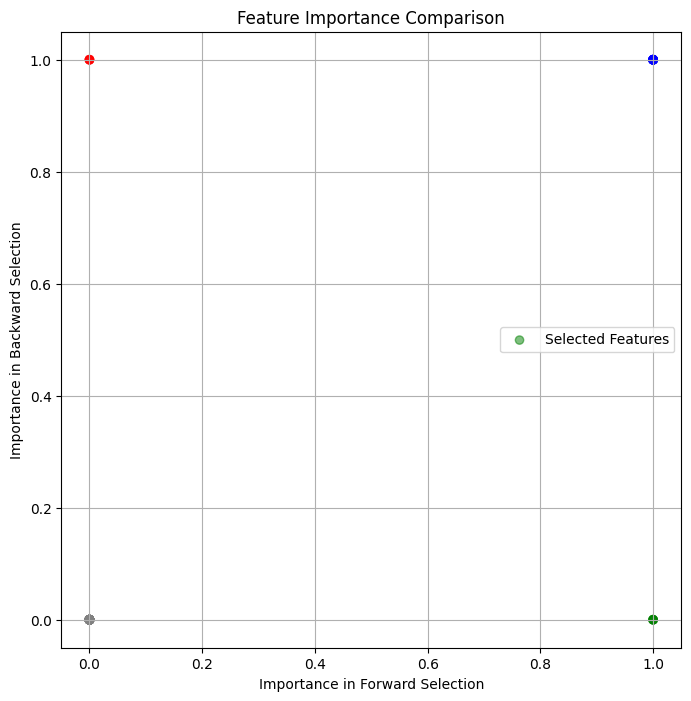

In [54]:
# Функція для визначення категорії ознаки
def feature_category(forward_imp, backward_imp):
    if forward_imp == 1 and backward_imp == 1:
        return "Both"
    elif forward_imp == 1 and backward_imp == 0:
        return "Forward Only"
    elif forward_imp == 0 and backward_imp == 1:
        return "Backward Only"
    else:
        return "Neither"

# Створення категорій ознак
feature_categories = [feature_category(forward_imp, backward_imp) for forward_imp, backward_imp in zip(forward_feature_importance, backward_feature_importance)]

# Візуалізація
plt.figure(figsize=(8, 8))
colors = {'Both':'blue', 'Forward Only':'green', 'Backward Only':'red', 'Neither':'gray'}
plt.scatter(forward_feature_importance, backward_feature_importance, c=[colors[cat] for cat in feature_categories], label='Selected Features', alpha=0.5)
plt.xlabel('Importance in Forward Selection')
plt.ylabel('Importance in Backward Selection')
plt.title('Feature Importance Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Функція для виведення назв ознак кожної категорії
def print_feature_names(feature_categories, features):
    for cat in set(feature_categories):
        print(f"{cat} Features:")
        for idx, feature in enumerate(features):
            if feature_categories[idx] == cat:
                print(feature)
        print()

# Виведення назв ознак для кожної категорії
print_feature_names(feature_categories, X.columns)

Backward Only Features:
Condition1
Condition2
BldgType
RoofStyle
Exterior1st

Neither Features:
MSZoning
Utilities
LotConfig
Neighborhood
YearBuilt
YearRemodAdd
RoofMatl
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtFinType1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition

Both Features:
MSSubClass
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
OverallQual
Exterior2nd
MasVnrType
MasVnrArea
ExterCond
BsmtExposure

Forward Only Features:
Id
LandSlope
HouseStyle
OverallCond
BsmtFinSF1



4 Лаб

In [78]:
from sklearn.linear_model import Lasso, ElasticNet

Основна мета моделей Lasso (Least Absolute Shrinkage and Selection Operator) і ElasticNet полягає в регуляризації та відборі ознак у моделі лінійної регресії. Обидві ці моделі використовують штрафні члени для контролю величини коефіцієнтів моделі, що допомагає уникнути перенавчання та покращити загальну узагальнюючу здатність моделі.

Основні завдання Lasso та ElasticNet:

Регуляризація: Обидві моделі використовують регуляризацію, що допомагає уникнути перенавчання шляхом обмеження розмірності коефіцієнтів моделі.

Відбір ознак: Lasso використовує L1-регуляризацію, яка має тенденцію звести деякі коефіцієнти до нуля, що дозволяє виконати відбір ознак із неважливими або менш важливими внесками до моделі. ElasticNet комбінує L1- та L2-регуляризацію, що дозволяє вирішувати проблему, коли Lasso може бути нелінійним або колінеарним. ElasticNet зазвичай працює краще в разі, коли є кореляція між ознаками.

Контроль мультиколінеарності: ElasticNet дозволяє контролювати мультиколінеарність, оскільки вона включає у себе L2-регуляризацію, яка допомагає розбити кореляцію між ознаками.

Основна різниця між Lasso та ElasticNet полягає у типах регуляризації, які вони використовують:

Lasso (L1-регуляризація):

Використовує штрафний член L1, який додає абсолютні значення коефіцієнтів до функції втрат.
L1-регуляризація має тенденцію звести деякі коефіцієнти до нуля, що дозволяє виконати відбір ознак.
Ефективна для ситуацій, коли існує багато ознак і деякі з них можуть бути менш важливими або навіть незначними.


ElasticNet (комбінація L1 та L2-регуляризації):

Використовує комбінацію штрафних членів L1 та L2, що дозволяє контролювати розмірність коефіцієнтів та мультиколінеарність.
L2-регуляризація додає квадратичні значення коефіцієнтів до функції втрат, що допомагає контролювати мультиколінеарність та допомагає уникнути перенавчання.
Більш ефективна в умовах, де є велика кореляція між ознаками, оскільки вона дозволяє ефективно керувати цією кореляцією.

In [79]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso)])
model_lasso.fit(X_train, y_train)
lasso_train_mse = mean_squared_error(y_train, model_lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, model_lasso.predict(X_test))
print("Lasso Regression:")
print(f"Training MSE: {lasso_train_mse}")
print(f"Test MSE: {lasso_test_mse}")

Lasso Regression:
Training MSE: 368963633.28839844
Test MSE: 920359375.3695855


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215238305251.37247, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(



На основі наданих даних про модель Lasso Regression можна зробити наступний висновок:

Training MSE (Mean Squared Error)

 Значення MSE для навчального набору даних складає 368,963,633.29. Це означає, що середньо квадратична помилка моделі на навчальних даних дорівнює цій величині. MSE вказує на середню квадратичну відстань між фактичними значеннями та прогнозованими значеннями моделі. Низьке значення MSE на навчальному наборі вказує на те, що модель може добре підлаштуватися до даних під час навчання.

Test MSE

Значення MSE для тестового набору даних складає 920,359,375.37. Це означає, що середньо квадратична помилка моделі на тестових даних дорівнює цій величині. MSE на тестовому наборі є важливим метрикою для оцінки загальної ефективності моделі на нових даних. Велике значення MSE на тестовому наборі може свідчити про недооцінку моделі або її недостатню здатність узагальнювати на нові дані.

Отже, на основі наведених даних можна зробити висновок, що модель Lasso Regression може мати тенденцію до перенавчання або показувати погану здатність узагальнення на нові дані.

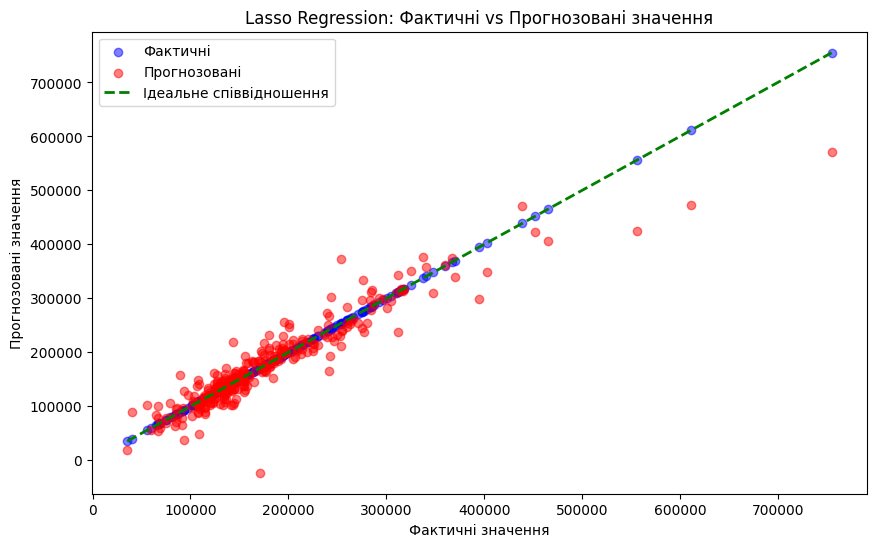

In [83]:
# Візуалізація Lasso Regression
plt.figure(figsize=(10, 6))

# Фактичні значення
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Фактичні')

# Прогнозовані значення
plt.scatter(y_test, model_lasso.predict(X_test), color='red', alpha=0.5, label='Прогнозовані')

# Побудувати лінію ідеального співвідношення
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', linewidth=2, label='Ідеальне співвідношення')

plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Lasso Regression: Фактичні vs Прогнозовані значення')
plt.legend()
plt.show()


In [81]:
# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_elastic_net = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_net)])
model_elastic_net.fit(X_train, y_train)
elastic_net_train_mse = mean_squared_error(y_train, model_elastic_net.predict(X_train))
elastic_net_test_mse = mean_squared_error(y_test, model_elastic_net.predict(X_test))
print("ElasticNet Regression:")
print(f"Training MSE: {elastic_net_train_mse}")
print(f"Test MSE: {elastic_net_test_mse}")

ElasticNet Regression:
Training MSE: 733985340.9721303
Test MSE: 1004535848.1738745


На основі наданих даних про модель ElasticNet Regression можна зробити наступний висновок:

Training MSE (Mean Squared Error)

Значення MSE для навчального набору даних становить 733,985,340.97. Це означає, що середньоквадратична помилка моделі на навчальних даних дорівнює цій величині. MSE вказує на середню квадратичну відстань між фактичними значеннями та прогнозованими значеннями моделі. Низьке значення MSE на навчальному наборі вказує на те, що модель може добре підлаштуватися до даних під час навчання.

Test MSE

Значення MSE для тестового набору даних становить 1,004,535,848.17. Це означає, що середньоквадратична помилка моделі на тестових даних дорівнює цій величині. MSE на тестовому наборі є важливим метрикою для оцінки загальної ефективності моделі на нових даних. Велике значення MSE на тестовому наборі може свідчити про недооцінку моделі або її недостатню здатність узагальнювати на нові дані.

Отже, на основі наведених даних можна зробити висновок, що модель ElasticNet Regression також може мати тенденцію до перенавчання або показувати погану здатність узагальнення на нові дані, як підтверджується великим значенням MSE на тестовому наборі.

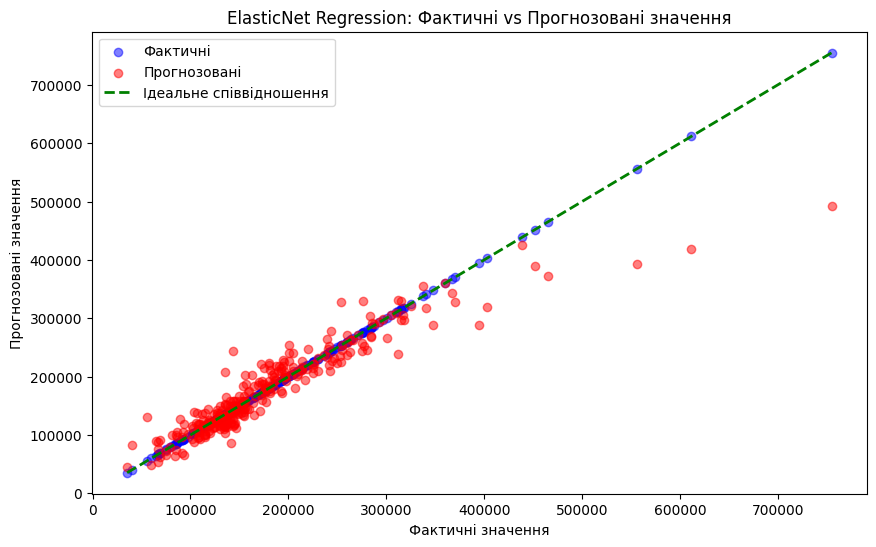

In [84]:
# Візуалізація ElasticNet Regression
plt.figure(figsize=(10, 6))

# Фактичні значення
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Фактичні')

# Прогнозовані значення
plt.scatter(y_test, model_elastic_net.predict(X_test), color='red', alpha=0.5, label='Прогнозовані')

# Побудувати лінію ідеального співвідношення
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', linewidth=2, label='Ідеальне співвідношення')

plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('ElasticNet Regression: Фактичні vs Прогнозовані значення')
plt.legend()
plt.show()
